<a href="https://colab.research.google.com/github/VishnuPy/MyPython/blob/master/BreastCancer_Imbalance_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive
'My Drive'/


In [0]:
import pandas as pd
import numpy as np
from numpy import random

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [0]:
columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion',
          'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

In [0]:
#this breast cancer txt file is different from csv file. Check out
data = pd.read_table("/gdrive/My Drive/MyLearning/MLDLAIPython/Data/TextData/breast-cancer-wisconsin-data.txt", delimiter=',', header=None)
data.columns = columns

In [5]:
print (data.shape)
data.head()

(699, 11)


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
data.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

The target label has two classes 1) label 2 is benign which is no breast cancer 
2) label 4 is malignant which means the patient has breast cancer. For model training and evaluation, the patients with no breast cancer have been labelled as 0 and with breast cancer as 1

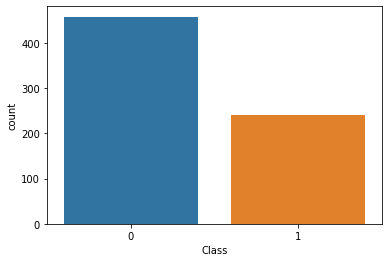

In [7]:
data ['Class'] = data['Class'].apply(lambda x: 1 if x ==4 else 0)
sns.countplot(data['Class'])
plt.show()

The data is imbalanced, but its not very terrible.For the purpose of this analysis, the dataset needs to be very imbalanced. Hence only 5% of the positive instances will be used from original dataset

In [8]:
#separate class 0 from 1
data_m = data[data['Class']==1]
data_b = data[data['Class']==0]

print (data_m.shape)
print (data_b.shape)

(241, 11)
(458, 11)


In [9]:
# sampling from positive instances and appending to class 0 data
random.seed(0)
data_m_sample = data_m.sample(12, replace=False)
new_data = pd.concat([data_b, data_m_sample])
print (new_data.shape)

(470, 11)


In [0]:
def data_check(df, column_list):
    """    
    Function to perform data cleaning i.e
    dropping rows and columns with invalid entries
    and converting the dtypes of the columns to be sklearn friendly
    
    parameters: pandas dataframe, list of columns that need to be dropped
    returns: processed dataframe
    """
    for col in column_list:
        df.drop(col, axis=1, inplace=True)
    df.dropna(inplace=True)
    print(df.shape)
    cols_to_process = []
    for indx, dt in enumerate(df.dtypes):
        if dt != int:
            cols_to_process.append(df.dtypes.index[indx])
    for col in cols_to_process:
        invalid_inputs = set()
        for val in df[col]:
            try:
                int(val)
            except:
                invalid_inputs.add(val)
        if invalid_inputs:
            print(col)
            print ('invalid input: {}'.format(invalid_inputs))
        for iv in invalid_inputs:
            df = df[df[col] != iv]
        df[col] = df[col].astype(int)
    return df

In [11]:
new_data = data_check(new_data, ['Sample code number'] )

(470, 10)
Bare Nuclei
invalid input: {'?'}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
new_data.to_csv("/gdrive/My Drive/MyLearning/MLDLAIPython/Data/TextData/updated_breast_cancer_overly_imbalanced_data.csv")

In [13]:
from imblearn.over_sampling import SMOTE
from numpy.random import RandomState
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_palette(['#06B1F0', '#FC4B60'])
random_seed = 63445

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [14]:
new_data = pd.read_csv("/gdrive/My Drive/MyLearning/MLDLAIPython/Data/TextData/updated_breast_cancer_overly_imbalanced_data.csv", index_col=0)
print ("DATA SHAPE: ", new_data.shape)
new_data.head()

DATA SHAPE:  (456, 10)


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


**Class Distribution**

In [15]:
new_data['Class'].value_counts()

0    444
1     12
Name: Class, dtype: int64

The problem we are trying to solve in this analysis is breast cancer prediction. Based on the features available, we are going to predict whether the tumor a patient has is benign or malignant. One of the biggest challenges of this analysis is to deal with an imbalanced dataset

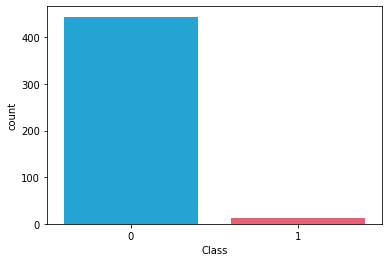

In [16]:
sns.countplot(new_data['Class'])
plt.show()

In [0]:
def metrics(true, preds):
    """
    Function to calculate evaluation metrics 
    parameters: true values, predictions
    prints accuracy, recall, precision and f1 scores
    """
    accuracy = accuracy_score(true, preds)
    recall = recall_score(true, preds)
    precision = precision_score(true, preds)
    f1score = f1_score(true, preds)
    print ('accuracy: {}, recall: {}, precision: {}, f1-score: {}'.format(accuracy, recall, precision, f1score))

In [18]:

x_train, x_test, y_train, y_test = train_test_split(new_data.drop('Class', axis=1), new_data['Class'], test_size = 0.30, random_state=random_seed, stratify=new_data['Class'])
print ("TRAIN DATA SHAPE: ", x_train.shape)
print ("TEST DATA SHAPE: ", x_test.shape)
rf = RandomForestClassifier(n_estimators=5, random_state=random_seed)
rf.fit(x_train, y_train)

TRAIN DATA SHAPE:  (319, 9)
TEST DATA SHAPE:  (137, 9)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=63445,
                       verbose=0, warm_start=False)

In [19]:
preds = rf.predict(x_test)
metrics(y_test, preds)

accuracy: 0.9708029197080292, recall: 0.0, precision: 0.0, f1-score: 0.0


**Over-sampling the minority class in training set using SMOTE**

In [20]:
sm = SMOTE(random_state=random_seed)
X, y = sm.fit_sample(x_train, y_train, )

print('Shape of oversample data. {}'.format(X.shape))
print('Shape of y. {}'.format(y.shape))

Shape of oversample data. (622, 9)
Shape of y. (622,)


In [0]:
X = np.floor(X).astype(int)


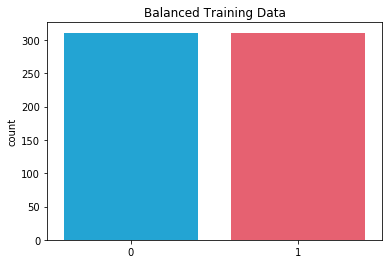

In [22]:
sns.countplot(y)
plt.title('Balanced Training Data')
plt.show()

In [23]:
rf = RandomForestClassifier(n_estimators=5, random_state=random_seed)
recall_scores = cross_val_score(rf, X, y, scoring='recall', cv=5)
f1_scores = cross_val_score(rf, X, y, scoring='f1', cv=5)
accuracy_scores = cross_val_score(rf, X, y, scoring='accuracy', cv=5)
precision_scores = cross_val_score(rf, X, y, scoring='precision', cv=5)

print ('Average Recall Score: {}'.format(np.mean(recall_scores)))
print ('Average F1 Score: {}'.format(np.mean(f1_scores)))
print ('Average Accracy Score: {}'.format(np.mean(accuracy_scores)))
print ('Average Precision Score: {}'.format(np.mean(precision_scores)))

Average Recall Score: 1.0
Average F1 Score: 0.9936755905511812
Average Accracy Score: 0.9935483870967742
Average Precision Score: 0.9875946275946277


**whoohooo. the cross validation scores look amazing. Let's see how it performs on test data**

**Results of Training Dataset**

In [24]:
preds = cross_val_predict(rf, X, y , cv=5)
print ('Accuracy score: {}'.format(accuracy_score(y, preds)))
print ('Recall score: {}'.format(recall_score(y, preds)))
print ('Precision score: {}'.format(precision_score(y, preds)))
print ('f1-score: {}'.format(f1_score(y, preds)))

Accuracy score: 0.9935691318327974
Recall score: 1.0
Precision score: 0.9873015873015873
f1-score: 0.9936102236421726


**Results of Test Dataset**

In [25]:
rf = RandomForestClassifier(n_estimators=5, random_state=random_seed)
rf.fit(X, y)
test_preds = rf.predict(x_test)
print('Accuracy Score: {}'.format(accuracy_score(y_test, test_preds)))
print('Recall Score: {}'.format(recall_score(y_test, test_preds)))
print('Precision Score: {}'.format(precision_score(y_test, test_preds)))
print('F1 Score: {}'.format(f1_score(y_test, test_preds)))

Accuracy Score: 0.9781021897810219
Recall Score: 0.5
Precision Score: 0.6666666666666666
F1 Score: 0.5714285714285715


Test results are not as expected. Cross Validation Recall was 100% where as in Test it is only 50%. Looks like its over-fitting despite the Cross-validation to ensure model does not overfit. 
Lets look at the class distribution.

**Distribution of features over malignant and benign tumors**

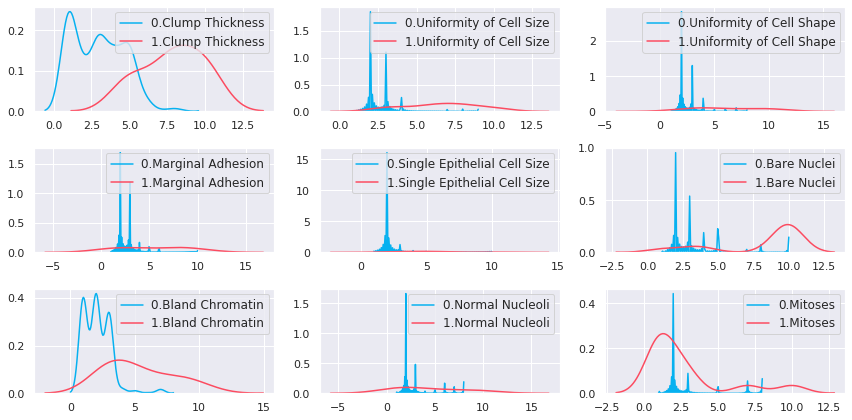

In [26]:
ccols = new_data.columns

grouped_data = new_data.groupby('Class')
sns.set(font_scale=1)
sns.set_palette(['#06B1F0', '#FC4B60'])
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,6), tight_layout=True)

for ax, p in zip(axes.ravel(), ccols):
    for k, v in grouped_data[p]:
        sns.kdeplot(v, ax=ax, label=str(k)+"."+v.name)
        plt.setp(ax.get_legend().get_texts(), fontsize='12')
plt.show()

As can be seen, only two features have high discriminative power between classes 0 and 1, that is, Clumnp Thickness and Bare Nuclei have high class overlap. Rest of the feature do not have much overlap. 
This tells us that features and cross-validation did not contribute to Overfitting. This leave us with some kind of data leakage from training to test. If we recollect, Cross-validation happened after Upsampling. Ideally, Oversampling should be done only on Training dataset in each Cross-validation iteration. This would have prevented the information bleeding from validation set to the training set during cross-validation. 

**Oversampling in each cross-validation loop**

In [27]:
kf = StratifiedKFold(n_splits=5, random_state=random_seed)
cross_val_f1score_lst = []
cross_val_accuracy_lst = []
cross_val_precision_lst = []
cross_val_recall_lst = []

for train_index_lst, validation_index_lst in kf.split(x_train, y_train):
    #keeping validation set aside and oversampling in each iteration using SMOTE
    train, validation = x_train.iloc[train_index_lst], x_train.iloc[validation_index_lst]
    target_train, target_val = y_train.iloc[train_index_lst], y_train.iloc[validation_index_lst]
    sm = SMOTE(random_state=random_seed)
    X_train_res, y_train_res = sm.fit_sample(train, target_train)
    print(X_train_res.shape, y_train_res.shape)

    #Training the model on oversampled 4 folds of training set
    rf = RandomForestClassifier(n_estimators=5, random_state=random_seed)
    rf.fit(X_train_res, y_train_res)

    #testing on 1 fold of validation set
    validation_preds = rf.predict(validation)
    cross_val_recall_lst.append(recall_score(target_val, validation_preds))
    cross_val_precision_lst.append(precision_score(target_val, validation_preds))
    cross_val_accuracy_lst.append(accuracy_score(target_val, validation_preds))
    cross_val_f1score_lst.append(f1_score(target_val, validation_preds))

print ('Cross validated accuracy: {}'.format(np.mean(cross_val_accuracy_lst)))
print ('Cross validated recall score: {}'.format(np.mean(cross_val_recall_lst)))
print ('Cross validated precision score: {}'.format(np.mean(cross_val_precision_lst)))
print ('Cross validated f1_score: {}'.format(np.mean(cross_val_f1score_lst)))

(496, 9) (496,)
(498, 9) (498,)
(498, 9) (498,)
(498, 9) (498,)
(498, 9) (498,)
Cross validated accuracy: 0.9779761904761906
Cross validated recall score: 0.7
Cross validated precision score: 0.5833333333333333
Cross validated f1_score: 0.5733333333333334


In [0]:
r_s, p_s = np.mean(recall_scores), np.mean(precision_scores)
a_s, f_s = np.mean(accuracy_scores), np.mean(f1_scores)

r_s_l, p_s_l = np.mean(cross_val_recall_lst), np.mean(cross_val_precision_lst)
a_s_l, f_s_l = np.mean(cross_val_accuracy_lst), np.mean(cross_val_f1score_lst)

metrics_df_wrong = pd.DataFrame(list(zip([r_s], [p_s], [f_s], [a_s])), columns=['Recall', 'Precision', 'F1Score', 'Accuracy'])
metrics_df_right = pd.DataFrame(list(zip([r_s_l], [p_s_l], [f_s_l], [a_s_l])), columns=['Recall', 'Precision', 'F1Score', 'Accuracy'])
metrics_df = pd.concat([metrics_df_wrong, metrics_df_right], axis=0)

In [0]:
metrics_df.index = (['Cross Validation and Oversampling done Wrong', 'Cross Validation and Oversampling done Right'])
metrics_df = metrics_df.transpose()

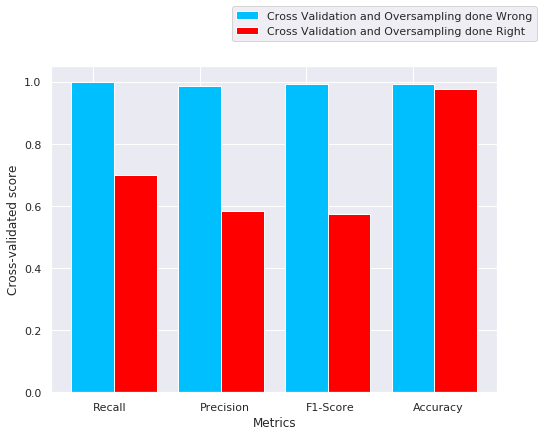

In [30]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.bar([0, 2, 4, 6], metrics_df['Cross Validation and Oversampling done Wrong'], 
       color='deepskyblue', label='Cross Validation and Oversampling done Wrong')
ax.bar([0.8, 2.8, 4.8, 6.8], metrics_df['Cross Validation and Oversampling done Right'], 
       color='red', label='Cross Validation and Oversampling done Right')

ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.2))
plt.xticks([0, 2 ,4 ,6], ['Recall', 'Precision', 'F1-Score', 'Accuracy'], horizontalalignment='left')
plt.xlabel('Metrics')
plt.ylabel('Cross-validated score')
plt.show()